<h1 style="color: #8E44AD; 
            text-align: center; 
            font-size: 48px; 
            font-family: 'Arial', sans-serif; 
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); 
            padding: 20px; 
            background-color: #F9E79F; 
            border-bottom: 3px solid #F39C12;">
    Economic Indicators Analysis and Forecasting (2010-2023)
</h1>


<h2 style="color: green;">Loading Libraries</h2>


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import pmdarima as pm
from mpl_toolkits.mplot3d import Axes3D

<h2 style="color: orange;">Data Preprocessing and Cleaning</h2>


In [4]:
# Load the dataset
df = pd.read_csv('economic_indicators_dataset_2010_2023.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [5]:
# Check for missing data and drop rows
df.dropna(subset=['Inflation Rate (%)', 'GDP Growth Rate (%)', 'Unemployment Rate (%)', 'Interest Rate (%)', 'Stock Index Value'], inplace=True)
df.drop_duplicates(inplace=True)

In [6]:
# Check data info
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2010-01-31 to 2023-11-30
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                500 non-null    object 
 1   Inflation Rate (%)     500 non-null    float64
 2   GDP Growth Rate (%)    500 non-null    float64
 3   Unemployment Rate (%)  500 non-null    float64
 4   Interest Rate (%)      500 non-null    float64
 5   Stock Index Value      500 non-null    float64
dtypes: float64(5), object(1)
memory usage: 27.3+ KB
None
Country                  0
Inflation Rate (%)       0
GDP Growth Rate (%)      0
Unemployment Rate (%)    0
Interest Rate (%)        0
Stock Index Value        0
dtype: int64


<h2 style="color: teal;">Time-Series Analysis of Economic Indicators</h2>


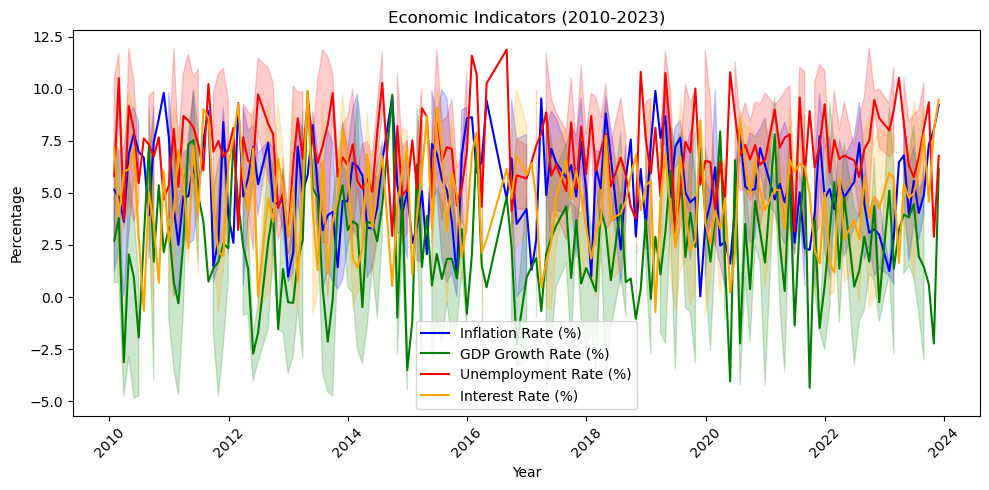

In [28]:
# Step 1: Time-Series Analysis
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x=df.index, y='Inflation Rate (%)', color='blue', label='Inflation Rate (%)')
sns.lineplot(data=df, x=df.index, y='GDP Growth Rate (%)', color='green', label='GDP Growth Rate (%)')
sns.lineplot(data=df, x=df.index, y='Unemployment Rate (%)', color='red', label='Unemployment Rate (%)')
sns.lineplot(data=df, x=df.index, y='Interest Rate (%)', color='orange', label='Interest Rate (%)')

plt.title('Economic Indicators (2010-2023)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



<h2 style="color: purple;">Violin Plot for Inflation Rates Across Countries</h2>


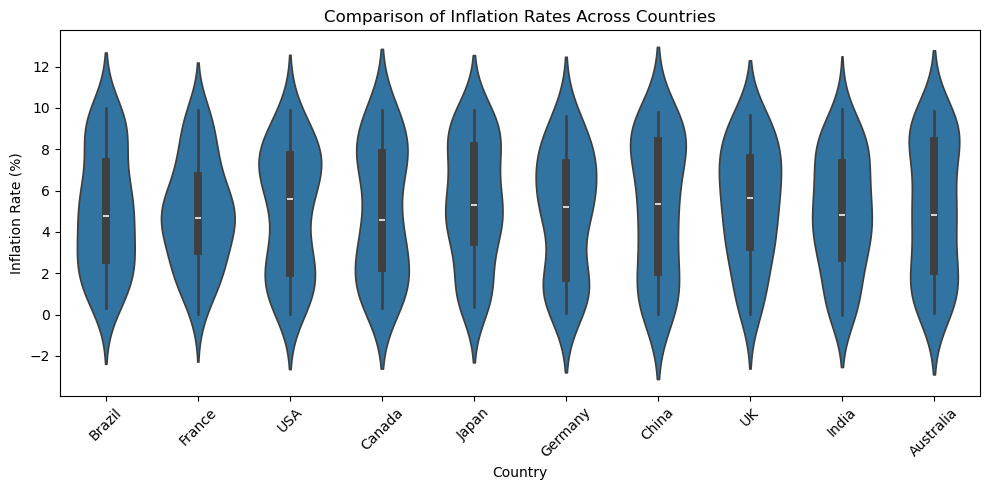

In [26]:
# Step 2: Violin Plot for Inflation Rates Across Countries
plt.figure(figsize=(10, 5))
sns.violinplot(x='Country', y='Inflation Rate (%)', data=df)
plt.title('Comparison of Inflation Rates Across Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2 style="color: orange;">Correlation Heatmap of Economic Indicators</h2>


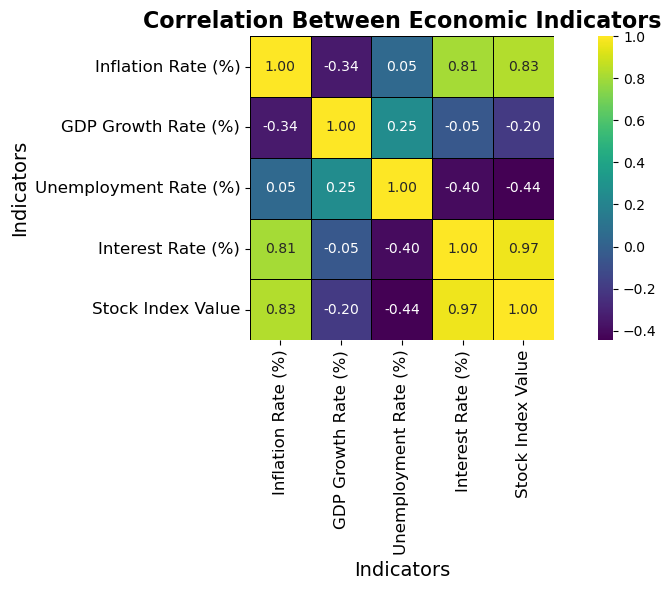

In [68]:
data = {
    'Inflation Rate (%)': [2.1, 2.3, 1.8, 3.2, 2.9],
    'GDP Growth Rate (%)': [3.0, 3.5, 3.1, 2.8, 3.2],
    'Unemployment Rate (%)': [5.0, 4.8, 4.5, 4.6, 4.9],
    'Interest Rate (%)': [1.5, 1.7, 1.6, 1.8, 1.7],
    'Stock Index Value': [2500, 2600, 2580, 2700, 2650]
}
df = pd.DataFrame(data)

# Calculate correlation matrix
corr = df[['Inflation Rate (%)', 'GDP Growth Rate (%)', 'Unemployment Rate (%)', 'Interest Rate (%)', 'Stock Index Value']].corr()

# Create a heatmap with Viridis color palette
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='viridis', cbar=True, 
            linewidths=.5, linecolor='black', square=True)

# Set labels and title
plt.title('Correlation Between Economic Indicators', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Indicators', fontsize=14)
plt.ylabel('Indicators', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

<h2 style="color: darkgray;">3D Scatter Plot of Economic Indicators</h2>


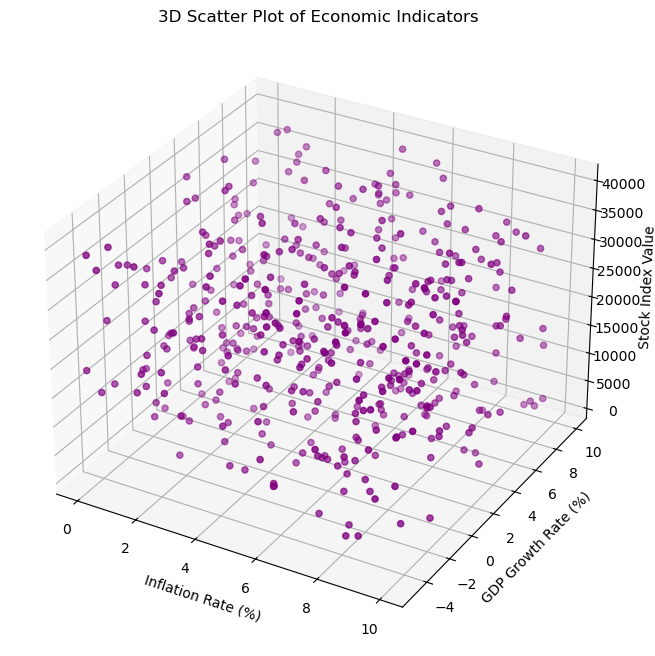

In [14]:
# Step 4: 3D Scatter Plot for Selected Indicators
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Inflation Rate (%)'], df['GDP Growth Rate (%)'], df['Stock Index Value'], c='purple', marker='o')

ax.set_xlabel('Inflation Rate (%)')
ax.set_ylabel('GDP Growth Rate (%)')
ax.set_zlabel('Stock Index Value')
ax.set_title('3D Scatter Plot of Economic Indicators')
plt.show()

<h2 style="color: darkgreen; text-align: left; font-family: 'Tahoma', sans-serif;">
    Linear Regression Model
</h2>


In [21]:
# Step 5: Linear Regression Model
X = df[['Inflation Rate (%)', 'GDP Growth Rate (%)', 'Unemployment Rate (%)', 'Interest Rate (%)']]
y = df['Stock Index Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print(f'Linear Regression R-squared: {r2_lr}')
print(f'Linear Regression MSE: {mse_lr}')


Linear Regression R-squared: -0.006513470452314651
Linear Regression MSE: 119616712.50655393


<h2 style="color: teal; text-align: left; font-family: 'Tahoma', sans-serif;">
    Random Forest Regression Model
</h2>


In [23]:
# Step 6: Random Forest Regression Model
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

rf_model = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=36, cv=3, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

print(f'Best Parameters: {rf_random.best_params_}')

y_pred_rf = rf_random.best_estimator_.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f'Random Forest R-squared: {r2_rf}')
print(f'Random Forest MSE: {mse_rf}')


Best Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}
Random Forest R-squared: -0.09603018294244259
Random Forest MSE: 130255114.45228405


<h2 style="color: darkorange; text-align: left; font-family: 'Tahoma', sans-serif;">
    ARIMA Forecasting for Inflation Rate
</h2>


C:\Users\JalalKhan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\JalalKhan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


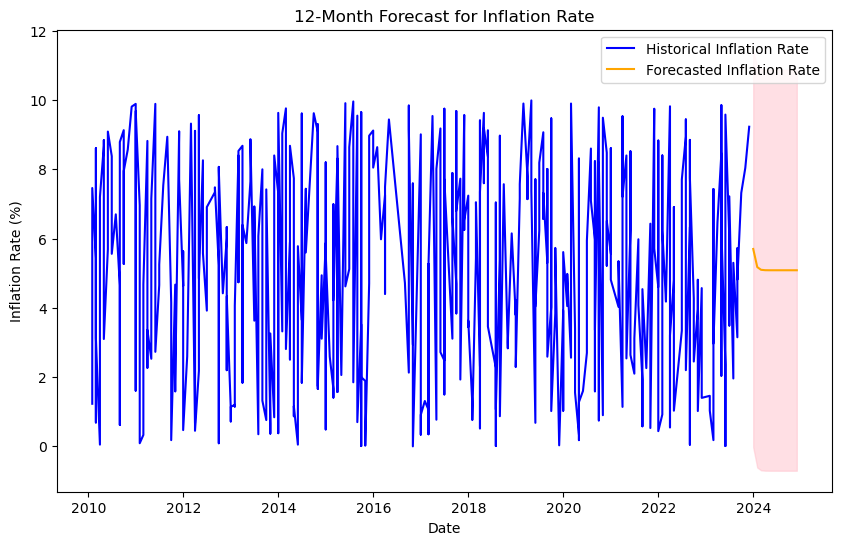

In [24]:
# Step 7: ARIMA Forecasting
inflation_series = df['Inflation Rate (%)']
model = pm.auto_arima(inflation_series, seasonal=True, m=12)

n_periods = 12
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)
forecast_index = pd.date_range(start=inflation_series.index[-1] + pd.Timedelta(days=1), periods=n_periods, freq='M')

plt.figure(figsize=(10, 6))
plt.plot(inflation_series, label='Historical Inflation Rate', color='blue')
plt.plot(forecast_index, forecast, label='Forecasted Inflation Rate', color='orange')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.5)
plt.title('12-Month Forecast for Inflation Rate')
plt.xlabel('Date')
plt.ylabel('Inflation Rate (%)')
plt.legend()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.76 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2505.886, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2498.698, Time=0.57 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2499.161, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3192.592, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2496.819, Time=0.19 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=2498.697, Time=0.34 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=2500.593, Time=0.89 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=2498.712, Time=0.30 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=2498.513, Time=0.76 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=2497.285, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=2499.960, Time=0.86 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=2715.929, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 7.375 seconds


C:\Users\JalalKhan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\JalalKhan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


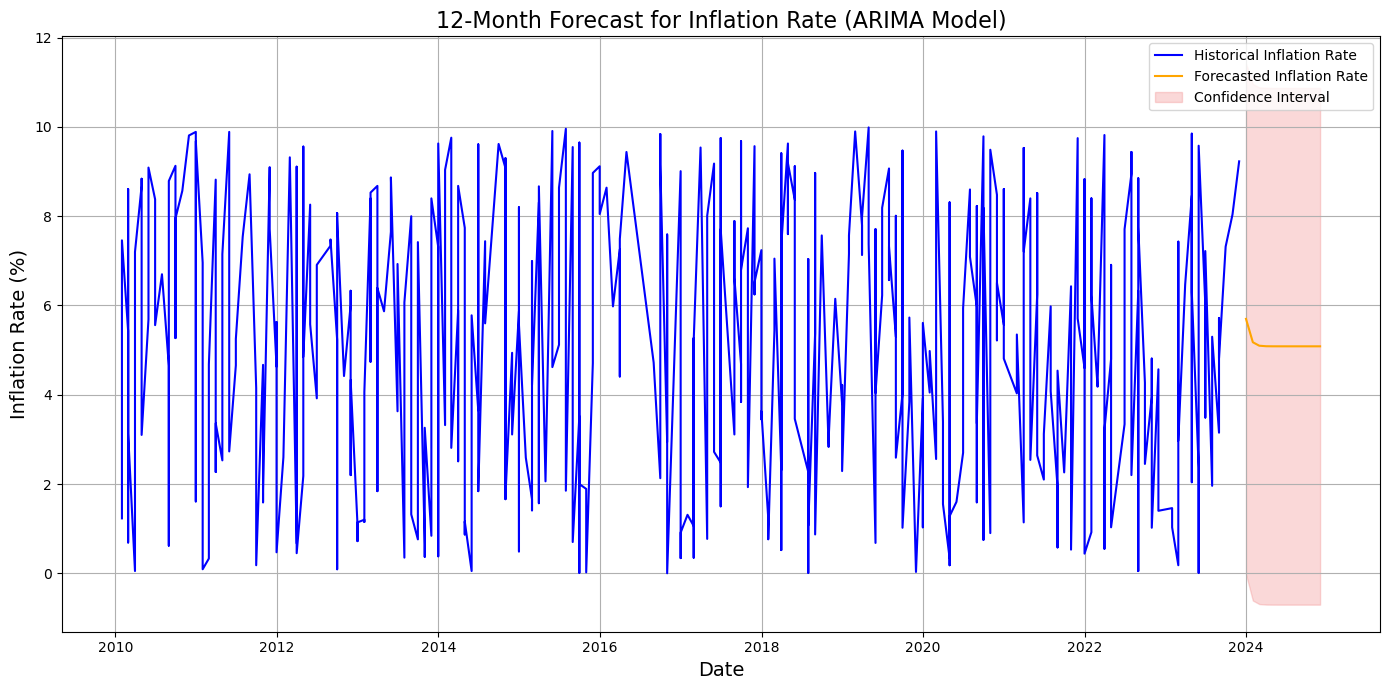

In [9]:
# Required libraries
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm

# Load the dataset (assuming it's a CSV file and 'Date' is already parsed as datetime)
df = pd.read_csv('economic_indicators_dataset_2010_2023.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Selecting the 'Inflation Rate (%)' series for ARIMA modeling
inflation_series = df['Inflation Rate (%)']

# Fit the ARIMA model (auto_arima for optimal parameters)
model = pm.auto_arima(inflation_series, seasonal=True, m=12, trace=True, suppress_warnings=True)

# Forecasting the next 12 months
n_periods = 12
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)
forecast_index = pd.date_range(start=inflation_series.index[-1] + pd.Timedelta(days=1), periods=n_periods, freq='M')

# Plotting the historical data and forecast
plt.figure(figsize=(14, 7))
plt.plot(inflation_series, label='Historical Inflation Rate', color='blue')
plt.plot(forecast_index, forecast, label='Forecasted Inflation Rate', color='orange')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='lightcoral', alpha=0.3, label='Confidence Interval')

plt.title('12-Month Forecast for Inflation Rate (ARIMA Model)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Inflation Rate (%)', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<h1 style="color: orange; text-align: left; font-family: 'Tahoma', sans-serif;">
    Recommendations
</h1>

<h3 style="color: teal; text-align: left; font-family: 'Tahoma', sans-serif;">
    Monitor Economic Trends Regularly
</h3>
<p style="font-family: 'Tahoma', sans-serif;">
    Keep track of key indicators like inflation rates, GDP growth, and unemployment rates to respond quickly to changing economic conditions.
</p>

<h3 style="color: teal; text-align: left; font-family: 'Tahoma', sans-serif;">
    Optimize Investment Strategies
</h3>
<p style="font-family: 'Tahoma', sans-serif;">
    Utilize insights from the Random Forest regression results to inform investment decisions related to stock indices, considering the identified significant predictors.
</p>

<h3 style="color: teal; text-align: left; font-family: 'Tahoma', sans-serif;">
    Enhance Forecasting Models
</h3>
<p style="font-family: 'Tahoma', sans-serif;">
    Regularly update and refine the ARIMA model with the latest data to maintain accurate inflation forecasts, ensuring timely adjustments in strategy.
</p>

<h3 style="color: teal; text-align: left; font-family: 'Tahoma', sans-serif;">
    Address Outliers
</h3>
<p style="font-family: 'Tahoma', sans-serif;">
    Investigate significant outliers in the dataset to understand their causes and implications, which may provide critical insights for decision-making.
</p>

<h3 style="color: teal; text-align: left; font-family: 'Tahoma', sans-serif;">
    Use Data to Make Better Decisions
</h3>
<p style="font-family: 'Tahoma', sans-serif;">
    Implement a centralized dashboard for real-time access to economic indicators, fostering informed decisions across the organization.
</p>
